#Team Details :
## CS23MTECH11020 - Suryansh Gautam
## CS23MTECH11008 - V Harikrishnan
## CS23MTECH11029 - Patel Heetkumar D.
## CS23MTECH13001 - Anil kumar Sharma
## CS23MTECH13002 - KR Anuraj


Installing required library

In [ ]:
!pip install networkx

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


Importing necessary libraries

In [ ]:
import math
import numpy as np
import torch.nn as nn
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from torch.optim import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

Reading and preprocessing data

In [ ]:
Payments_df=pd.read_csv('Payments.csv')
bad_sender_df=pd.read_csv('bad_sender.csv')

In [ ]:
Payments_df[:10]

,Sender,Receiver,Amount
0,1309,1011,123051
1,1309,1011,118406
2,1309,1011,112456
3,1309,1011,120593
4,1309,1011,166396
5,1309,1011,177817
6,1309,1011,169351
7,1309,1011,181038
8,1309,1011,133216
9,1309,1011,133254


In [ ]:
bad_sender_df[:]

,Bad Sender
0,1303
1,1259
2,1562
3,1147
4,1393
5,1031
6,1210
7,1042
8,1048
9,1256


Generating weighted directional graph

In [ ]:
G = nx.DiGraph()
for index, row in Payments_df.iterrows():
    sender = row['Sender']
    receiver = row['Receiver']
    amount = row['Amount']
    G.add_edge(sender, receiver, weight=amount)

Generting adjacency matrix

In [ ]:
adjacency_matrix = nx.adjacency_matrix(G).todense()
print(adjacency_matrix)

[[     0 170398      0 ...      0      0 166888]
 [     0      0      0 ...      0      0      0]
 [     0 113249      0 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...   5600      0      0]
 [     0      0      0 ...      0      0      0]]


In [ ]:
num_vertices = adjacency_matrix.shape[0]
unique_values_column1 = set(Payments_df['Sender'].unique())
unique_values_column2 = set(Payments_df['Receiver'].unique())

difference = unique_values_column1 - unique_values_column2

print("Difference between unique elements in column1 and column2:", difference)
print("Number of elements in Union between unique elements in column1 and column2:", len(unique_values_column1.union(unique_values_column2)))
print("Number of unique elements in Sender column:", len(unique_values_column1))
print("Number of unique elements in Receiver column:", len(unique_values_column2))

Difference between unique elements in column1 and column2: {2050, 2052, 2053, 2054, 2057, 2060, 2061, 2062, 2066, 2071, 2072, 2073, 2075, 2076, 2078, 2080, 2081, 2084, 2085, 2088, 2089, 2090, 2093, 2097, 2100, 2101, 2104, 2107, 2108, 2109, 2111, 2124, 2126, 2127, 2136, 2137, 2142, 2145, 2146, 2150, 2151, 2152, 2158, 2162, 2164, 2166, 2168, 2169, 2170, 2171, 2172, 2174, 2177, 2182, 2184, 2188, 2189, 2190, 1009, 1012, 1045, 1047, 1051, 1066, 1078, 1081, 1082, 1090, 1106, 1115, 1132, 1134, 1135, 1142, 1145, 1146, 1151, 1160, 1162, 1164, 1165, 1176, 1177, 1183, 1185, 1191, 1195, 1198, 1202, 1203, 1211, 1216, 1223, 1228, 1232, 1240, 1244, 1256, 1259, 1262, 1269, 1274, 1275, 1286, 1287, 1290, 1293, 1300, 1301, 1302, 1303, 1304, 1307, 1313, 1329, 1332, 1335, 1336, 1338, 1343, 1344, 1346, 1350, 1351, 1353, 1354, 1357, 1362, 1363, 1372, 1383, 1388, 1389, 1391, 1392, 1393, 1395, 1396, 1397, 1421, 1422, 1425, 1427, 1429, 1432, 1437, 1440, 1441, 1444, 1445, 1446, 1447, 1450, 1451, 1452, 1453, 1454

In [ ]:
bad_sender_df['Bad Sender']

0     1303
1     1259
2     1562
3     1147
4     1393
5     1031
6     1210
7     1042
8     1048
9     1256
10    1668
11    1161
12    1007
13    1034
14    1836
15    1099
16    1489
17    1821
18    1076
19    1944
Name: Bad Sender, dtype: int64

In [ ]:
unique_senders = set()

for u, v, data in G.edges(data=True):
    sender = u
    unique_senders.add(sender)

unique_senders_list = list(unique_senders)
print("Unique sender nodes:", unique_senders_list)

Unique sender nodes: [2050, 2052, 2053, 2054, 2057, 2060, 2061, 2062, 2066, 2071, 2072, 2073, 2075, 2076, 2078, 2080, 2081, 2084, 2085, 2088, 2089, 2090, 2093, 2097, 2100, 2101, 2104, 2107, 2108, 2109, 2111, 2124, 2126, 2127, 2136, 2137, 2142, 2145, 2146, 2150, 2151, 2152, 2158, 2162, 2164, 2166, 2168, 2169, 2170, 2171, 2172, 2174, 2177, 2182, 2184, 2188, 2189, 2190, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1019, 1020, 1021, 1023, 1025, 1026, 1027, 1028, 1030, 1031, 1033, 1034, 1035, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1047, 1048, 1049, 1050, 1051, 1054, 1056, 1057, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1093, 1094, 1096, 1098, 1099, 1100, 1101, 1103, 1104, 1105, 1106, 1108, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1120, 1121, 1122, 1123, 1124, 1126, 1128, 1129, 1130, 

checking the multi edges in the graph

In [ ]:
multi_edges = {}

for i in range(len(unique_senders_list)):
    adjacent_edges = G.edges(unique_senders_list[i], data=True)

    for edge in adjacent_edges:
        u, v, data = edge
        weight = data['weight']
        edge_key = (u, v)

        if edge_key in multi_edges:
            multi_edges[edge_key].append(weight)
            print("multi-edge")
        else:
            multi_edges[edge_key] = [weight]


Checking the edges corresponding to the bad senders that are with us from bad-senders dataset

In [ ]:
adjacent_edges=[]
for i in range(len(bad_sender_df['Bad Sender'])):
  adjacent_edges.append(G.edges(bad_sender_df['Bad Sender'][i], data=True))

for i in range(len(bad_sender_df['Bad Sender'])):
  for edge in adjacent_edges[i]:
    u, v, weight = edge
    print(f"Edge {u}-{v} has weight {weight['weight']}")

Edge 1303-1311 has weight 43251
Edge 1259-1011 has weight 113249
Edge 1259-1004 has weight 84101
Edge 1259-1073 has weight 83802
Edge 1259-1079 has weight 116969
Edge 1259-1023 has weight 81610
Edge 1259-1030 has weight 100983
Edge 1259-1049 has weight 185061
Edge 1259-1039 has weight 115780
Edge 1259-1243 has weight 59503
Edge 1259-1108 has weight 86209
Edge 1259-1138 has weight 119540
Edge 1259-1099 has weight 114460
Edge 1259-1231 has weight 51207
Edge 1259-1149 has weight 82678
Edge 1259-1224 has weight 115957
Edge 1259-1172 has weight 83652
Edge 1259-1034 has weight 82277
Edge 1259-1398 has weight 80863
Edge 1259-1471 has weight 126015
Edge 1259-1483 has weight 118759
Edge 1259-1127 has weight 109407
Edge 1259-1373 has weight 54606
Edge 1259-1369 has weight 159764
Edge 1259-1348 has weight 91019
Edge 1259-1376 has weight 43269
Edge 1259-1215 has weight 53034
Edge 1259-1310 has weight 121462
Edge 1259-1569 has weight 29296
Edge 1259-1813 has weight 145069
Edge 1259-1318 has weight 

In [ ]:
multi_edges = {}

for i in range(len(bad_sender_df['Bad Sender'])):
    adjacent_edges = G.edges(bad_sender_df['Bad Sender'][i], data=True)
    for edge in adjacent_edges:
        u, v, data = edge
        weight = data['weight']
        edge_key = (u, v)
        if edge_key in multi_edges:
            multi_edges[edge_key].append(weight)
        else:
            multi_edges[edge_key] = [weight]
for edge_key, weights in multi_edges.items():
    u, v = edge_key
    print(f"Edge {u}-{v} has weights {weights}")

Edge 1303-1311 has weights [43251]
Edge 1259-1011 has weights [113249]
Edge 1259-1004 has weights [84101]
Edge 1259-1073 has weights [83802]
Edge 1259-1079 has weights [116969]
Edge 1259-1023 has weights [81610]
Edge 1259-1030 has weights [100983]
Edge 1259-1049 has weights [185061]
Edge 1259-1039 has weights [115780]
Edge 1259-1243 has weights [59503]
Edge 1259-1108 has weights [86209]
Edge 1259-1138 has weights [119540]
Edge 1259-1099 has weights [114460]
Edge 1259-1231 has weights [51207]
Edge 1259-1149 has weights [82678]
Edge 1259-1224 has weights [115957]
Edge 1259-1172 has weights [83652]
Edge 1259-1034 has weights [82277]
Edge 1259-1398 has weights [80863]
Edge 1259-1471 has weights [126015]
Edge 1259-1483 has weights [118759]
Edge 1259-1127 has weights [109407]
Edge 1259-1373 has weights [54606]
Edge 1259-1369 has weights [159764]
Edge 1259-1348 has weights [91019]
Edge 1259-1376 has weights [43269]
Edge 1259-1215 has weights [53034]
Edge 1259-1310 has weights [121462]
Edge 12

In [ ]:
nodes_order = list(G.nodes())
print('number of nodes: ', len(nodes_order))
for i, node in enumerate(nodes_order):
    print(f"Node '{node}' corresponds to row/column index {i} in the adjacency matrix")

number of nodes:  799
Node '1309' corresponds to row/column index 0 in the adjacency matrix
Node '1011' corresponds to row/column index 1 in the adjacency matrix
Node '1259' corresponds to row/column index 2 in the adjacency matrix
Node '1568' corresponds to row/column index 3 in the adjacency matrix
Node '1147' corresponds to row/column index 4 in the adjacency matrix
Node '1393' corresponds to row/column index 5 in the adjacency matrix
Node '1039' corresponds to row/column index 6 in the adjacency matrix
Node '1210' corresponds to row/column index 7 in the adjacency matrix
Node '1005' corresponds to row/column index 8 in the adjacency matrix
Node '1042' corresponds to row/column index 9 in the adjacency matrix
Node '1045' corresponds to row/column index 10 in the adjacency matrix
Node '1018' corresponds to row/column index 11 in the adjacency matrix
Node '1256' corresponds to row/column index 12 in the adjacency matrix
Node '1074' corresponds to row/column index 13 in the adjacency m

In [ ]:
len(G.nodes())

799

In [ ]:
bad_senders = bad_sender_df['Bad Sender'].tolist()
num_bad_senders = len(bad_sender_df)
sender_array = np.zeros(len(G.nodes()))
for sender in bad_senders:
    node_index = list(G.nodes()).index(sender)
    sender_array[node_index] = 1 / len(bad_senders)

print("Sender array:", sender_array)

Sender array: [0.   0.   0.05 0.   0.05 0.05 0.   0.05 0.   0.05 0.   0.   0.05 0.
 0.05 0.   0.05 0.05 0.   0.05 0.   0.   0.05 0.05 0.   0.05 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  

In [ ]:
bad_senders = bad_sender_df['Bad Sender'].tolist()
num_bad_senders = len(bad_sender_df)
for sender in bad_senders:
    node_index = list(G.nodes()).index(sender)


In [ ]:
for node in G.nodes():
    total_weight = sum([data['weight'] for _, _, data in G.edges(node, data=True)])
    for _, _, data in G.edges(node, data=True):
        data['weight'] /= total_weight
for edge in G.edges(data=True):
    u, v, data = edge
    print(f"Edge {u}-{v} has weight {data['weight']}")

Streaming output truncated to the last 5000 lines.
Edge 1007-1412 has weight 0.03422405942065667
Edge 1007-1050 has weight 0.035214016766440474
Edge 1007-1094 has weight 0.03367722343587118
Edge 1007-1328 has weight 0.013906591733061269
Edge 1007-1166 has weight 0.037377640086030145
Edge 1007-1340 has weight 0.01125972387684759
Edge 1007-1584 has weight 0.012980225835438959
Edge 1007-1199 has weight 0.012885595704246269
Edge 1007-1037 has weight 0.005283137137733778
Edge 1007-1276 has weight 0.04035104498161273
Edge 1007-1651 has weight 0.035773470102051654
Edge 1007-1769 has weight 0.03266884475788187
Edge 1007-1341 has weight 0.012249933569647903
Edge 1034-1074 has weight 0.028468609602750522
Edge 1034-1003 has weight 0.031727952565693274
Edge 1034-1004 has weight 0.02429435208801157
Edge 1034-1079 has weight 0.036546502538486604
Edge 1034-1105 has weight 0.02006134742836781
Edge 1034-1002 has weight 0.0027505220630841608
Edge 1034-1089 has weight 0.018752217062674856
Edge 1034-1023 

In [ ]:
np.array(sender_array)

array([0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.  , 0.05, 0.  , 0.05, 0.  ,
       0.  , 0.05, 0.  , 0.05, 0.  , 0.05, 0.05, 0.  , 0.05, 0.  , 0.  ,
       0.05, 0.05, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [ ]:
diff=math.inf
epsilon=1e-6

In [ ]:
for node in G.nodes():
  print(f"Node: {node}")
  for edge in G.edges(node, data=True):
    print(f"Edge: {edge}")

Streaming output truncated to the last 5000 lines.
Edge: (1595, 1003, {'weight': 0.9096245354451044})
Edge: (1595, 1499, {'weight': 0.09037546455489563})
Node: 1090
Edge: (1090, 1004, {'weight': 0.04334209632679225})
Edge: (1090, 1079, {'weight': 0.04521552003723954})
Edge: (1090, 1076, {'weight': 0.049078359476051846})
Edge: (1090, 1002, {'weight': 0.03711210399600133})
Edge: (1090, 1089, {'weight': 0.03649017311045569})
Edge: (1090, 1088, {'weight': 0.02807388386299206})
Edge: (1090, 1039, {'weight': 0.03589113538634118})
Edge: (1090, 1056, {'weight': 0.04424561309794076})
Edge: (1090, 1052, {'weight': 0.006863369797052124})
Edge: (1090, 1108, {'weight': 0.04274534791882085})
Edge: (1090, 1074, {'weight': 0.061220892299122046})
Edge: (1090, 1141, {'weight': 0.06775460057156593})
Edge: (1090, 1099, {'weight': 0.04587865861336121})
Edge: (1090, 1147, {'weight': 0.04381980029532178})
Edge: (1090, 1224, {'weight': 0.04616482313125031})
Edge: (1090, 1172, {'weight': 0.04120540125988698})


Trust rank algorithm

In [ ]:
def Trust_Rank(G, sender_array, size_bad_sender):
  diff=math.inf
  epsilon=1e-3
  max_itr=100
  initial_bad_score=sender_array
  i=1
  alpha=0.9
  print(running)
  while(diff>epsilon and i<max_itr):
    new_bad_score=np.zeros(len(G.nodes()))

    i=i+1
    for node in G.nodes():
      for edge in G.edges(node, data=True):
        tail, head, weight = edge
        node_index_head = list(G.nodes()).index(head)
        node_index_tail = list(G.nodes()).index(tail)
        new_bad_score[node_index_head] += weight['weight'] * initial_bad_score[node_index_tail]
    diff = np.abs(initial_bad_score - new_bad_score).max()

    forgotten=(1-sum(new_bad_score))/size_bad_sender
    forgotten_vector=np.array([forgotten if node!=0 else 0 for node in sender_array])
    new_bad_score+=forgotten_vector
    initial_bad_score=alpha*new_bad_score+(1-alpha)*sender_array
  return initial_bad_score

In [ ]:
final_score=Trust_Rank(G, sender_array, len(bad_sender_df))


1


In [ ]:
node_value_dict = {node: value for node, value in zip(G.nodes(), final_score)}
sorted_nodes = sorted(node_value_dict, key=node_value_dict.get, reverse=True)
top_50_nodes = sorted_nodes[:50]
print("Top 50 nodes based on values:")
print(top_50_nodes)

Top 50 nodes based on values:
[1210, 1205, 1042, 1086, 1094, 1122, 1626, 1007, 1258, 1173, 1034, 1076, 1041, 1099, 1147, 1048, 1005, 1129, 1144, 1088, 1161, 1175, 1037, 1084, 1489, 1138, 1201, 1836, 1311, 1259, 1393, 1256, 1668, 1944, 1031, 1562, 1821, 1303, 1296, 1230, 1130, 1239, 1369, 1133, 1079, 1013, 1574, 1309, 1480, 1004]


In [ ]:
Original_bad_sender_list = set(bad_sender_df['Bad Sender'])
new_top_50 = set(top_50_nodes)
print(len(new_top_50-Original_bad_sender_list))
print(Original_bad_sender_list-(Original_bad_sender_list-new_top_50))

30
{1668, 1031, 1161, 1034, 1099, 1489, 1042, 1303, 1048, 1944, 1562, 1821, 1256, 1259, 1836, 1007, 1393, 1076, 1210, 1147}


Plotting the bad senders where blue coloured samples are the normal senders, yellow samples are the bad senders that are given in bad-senders dataset and the red samples are predicted bad senders from the main dataset.

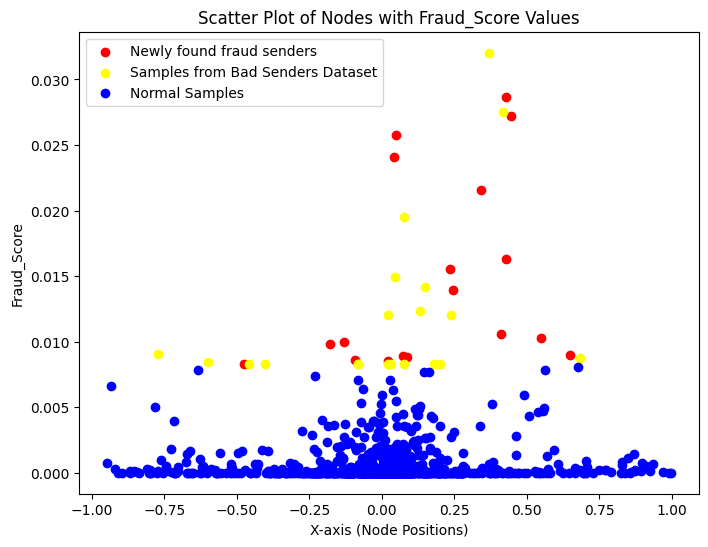

In [ ]:
pos = nx.spring_layout(G)
x = [pos[node][0] for node in G.nodes()]
y = final_score
plt.figure(figsize=(8, 6))

threshold = float('inf')
for node in G.nodes():
    if node in Original_bad_sender_list:
        scr = final_score[list(G.nodes()).index(node)]
        if scr < threshold:
            threshold = scr

colors = ['yellow' if node in Original_bad_sender_list else 'red' if final_score[list(G.nodes()).index(node)] >= threshold else 'blue' for node in G.nodes()]
for color in set(colors):
    indices = [i for i, c in enumerate(colors) if c == color]
    if color == 'red':
      lbl = "Newly found fraud senders"
    elif color == 'yellow':
      lbl = "Samples from Bad Senders Dataset"
    else:
      lbl = "Normal Samples"
    plt.scatter([x[i] for i in indices], [y[i] for i in indices], c=color, label=lbl)

plt.xlabel('X-axis (Node Positions)')
plt.ylabel('Fraud_Score')
plt.title('Scatter Plot of Nodes with Fraud_Score Values')
plt.legend()
plt.show()